In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("RabinovichFabrikant_benchmark.csv")
df.steps = df.steps.apply(eval)
df

,algorithm,heuristics,steps
0,BFS,none,"[52, 362, 517, 360, 318, 489, 153, 288, 49, 36..."
1,BFS,FVC,"[48, 97, 75, 57, 76, 75, 69, 47, 65, 48, 75, 4..."
2,BFS,AED,"[417, 490, 485, 53, 50, 184, 50, 48, 487, 389,..."
3,BFS,AEQD,"[47, 47, 48, 48, 48, 47, 48, 47, 47, 48, 47, 4..."
4,BFS,SMD,"[177, 47, 385, 385, 47, 121, 385, 311, 181, 38..."
5,ID-DLS,none,"[234, 158, 357, 447, 155, 367, 499, 496, 494, ..."
6,ID-DLS,FVC,"[45, 4, 36, 4, 15, 35, 35, 57, 4, 15, 57, 4, 4..."
7,ID-DLS,AED,"[482, 480, 480, 8, 5, 115, 7, 485, 338, 145, 8..."
8,ID-DLS,AEQD,"[4, 4, 5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 4, 5, 4, ..."
9,ID-DLS,SMD,"[371, 148, 86, 4, 230, 4, 4, 4, 371, 148, 371,..."


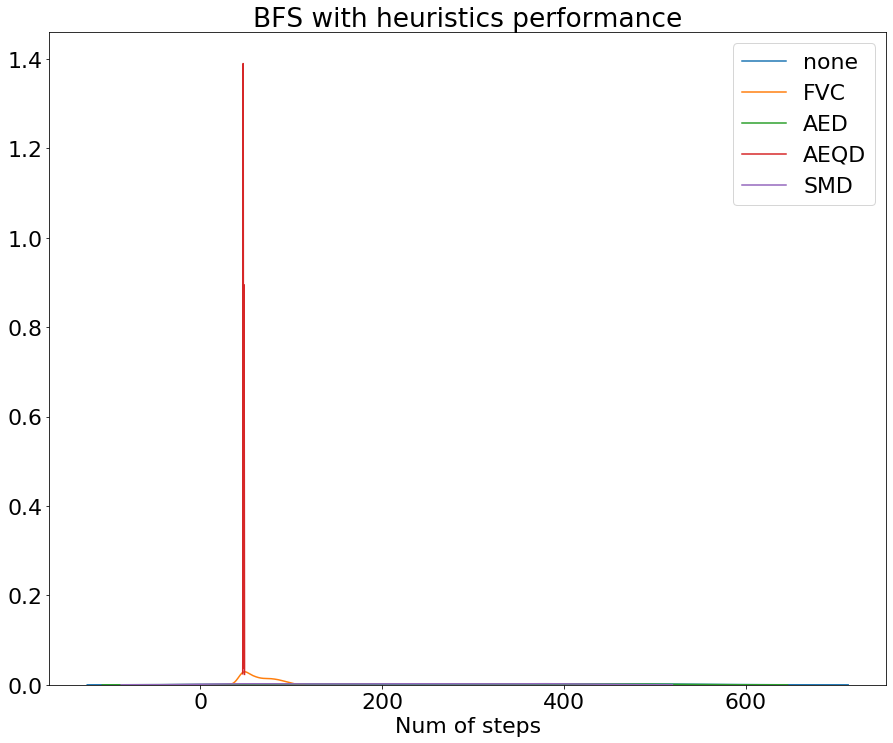

In [3]:
df_bfs = df[df.algorithm == "BFS"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_bfs[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("BFS with heuristics performance");

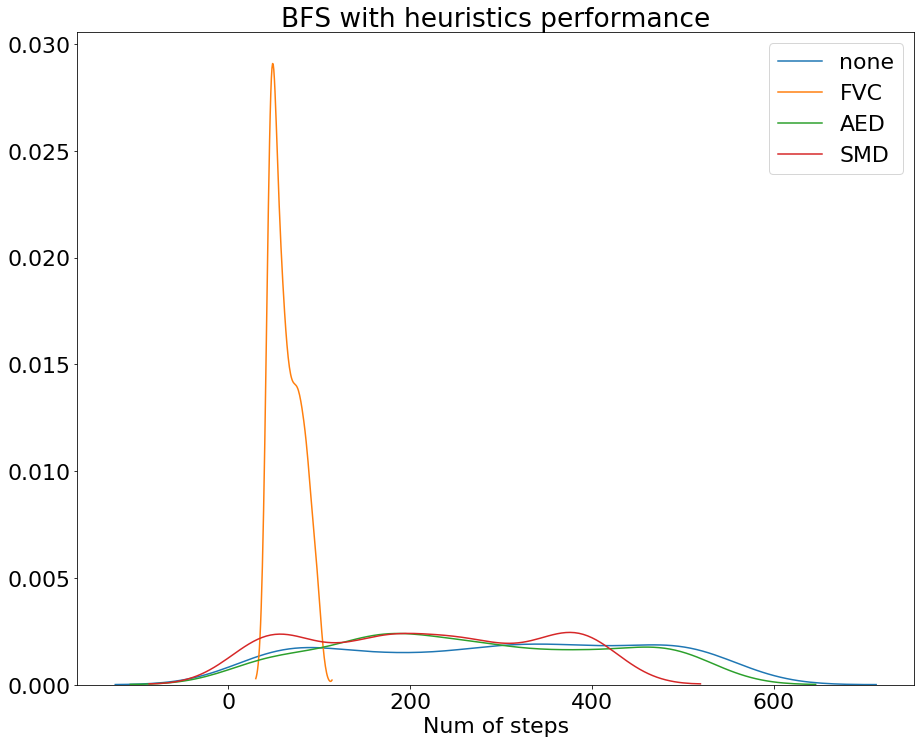

In [4]:
df_bfs_no_aeqd = df[(df.algorithm == "BFS") & (df.heuristics != "AEQD")][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_bfs_no_aeqd[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("BFS with heuristics performance");

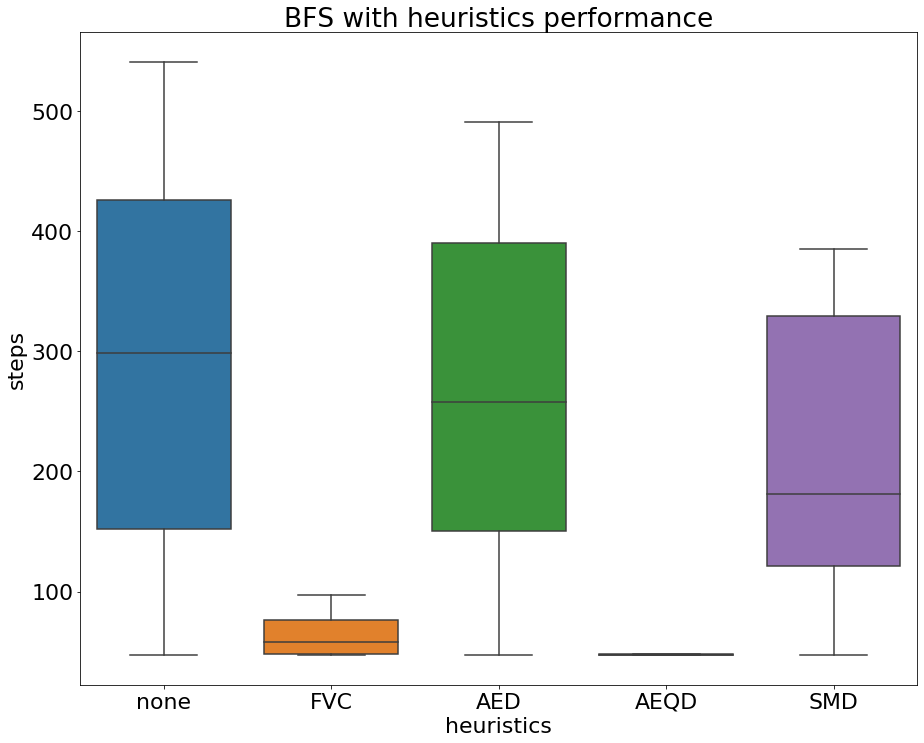

In [5]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_bfs.explode("steps"))
plt.title("BFS with heuristics performance");

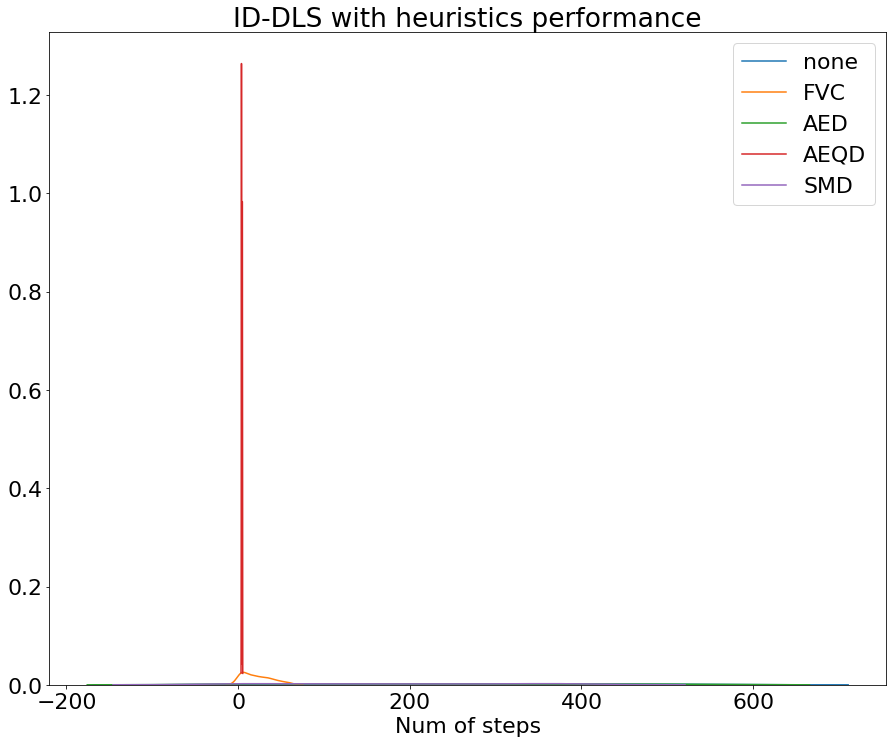

In [6]:
df_iddls = df[df.algorithm == "ID-DLS"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_iddls[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("ID-DLS with heuristics performance");

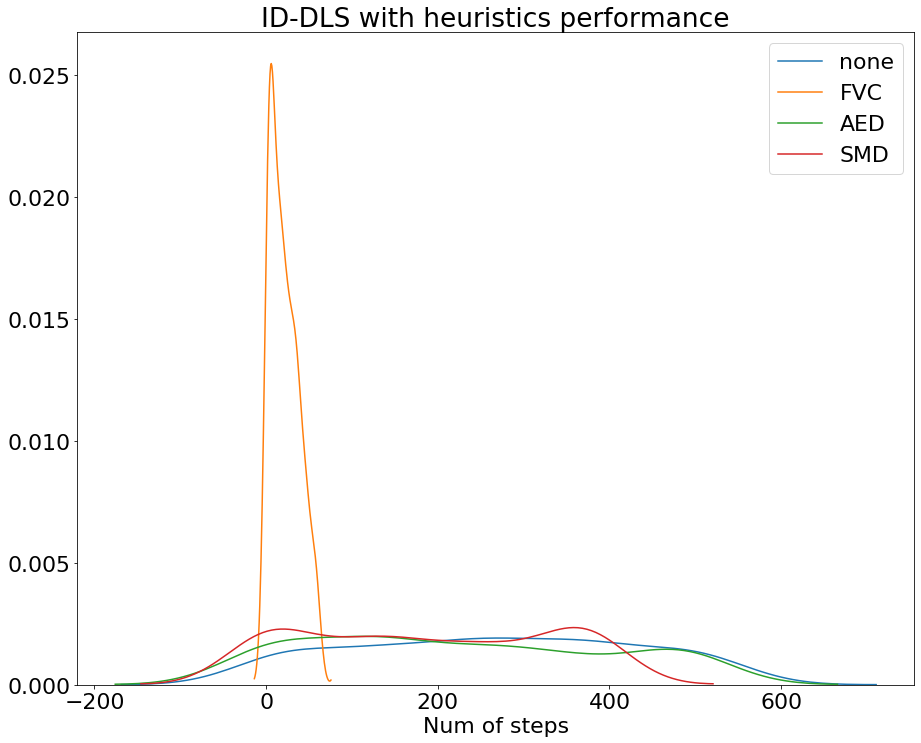

In [7]:
df_iddls_no_aeqd = df[(df.algorithm == "ID-DLS") & (df.heuristics != "AEQD")][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_iddls_no_aeqd[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("ID-DLS with heuristics performance");

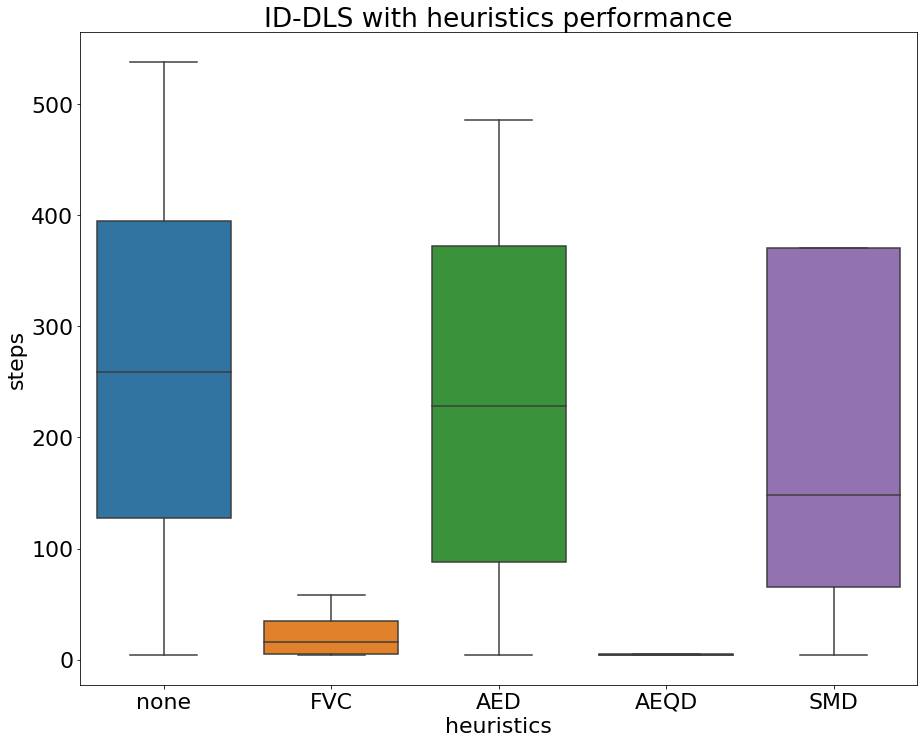

In [8]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_iddls.explode("steps"))
plt.title("ID-DLS with heuristics performance");

In [9]:
df_mmdr = df[df.algorithm == "MMDR"][["heuristics", "steps"]]

df_mmdr

df_mmdr_steps = 129

MMDR has fixed number of steps that equals 129.

c:\python\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\python\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


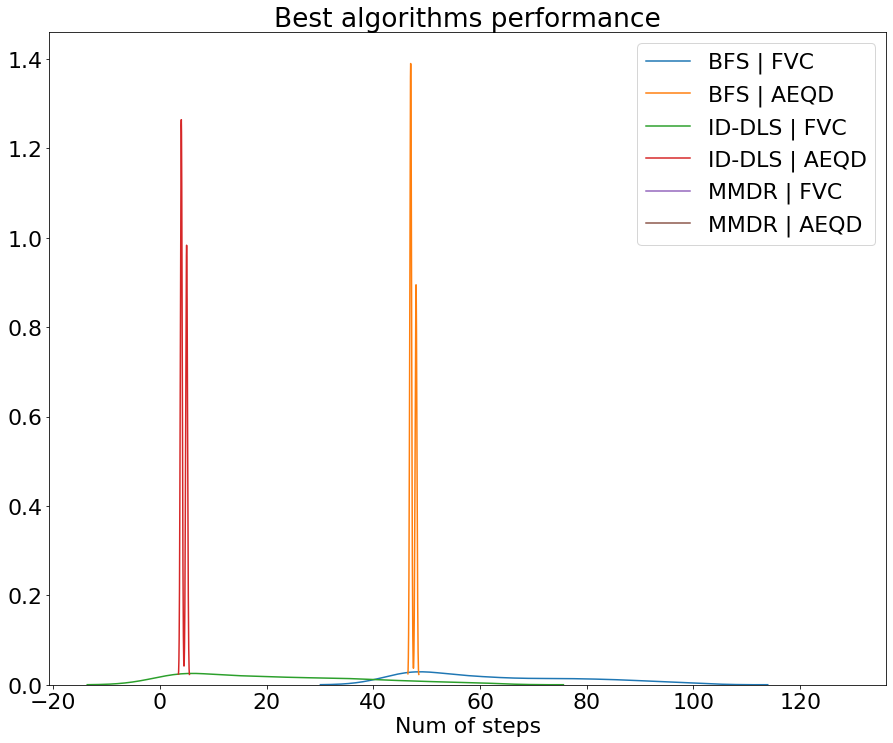

In [10]:
df_best = df[(df.heuristics.isin(["FVC", "AEQD"]))]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_best.iterrows():
    sns.distplot(row.steps, label=f"{row.algorithm} | {row.heuristics}", kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("Best algorithms performance");

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


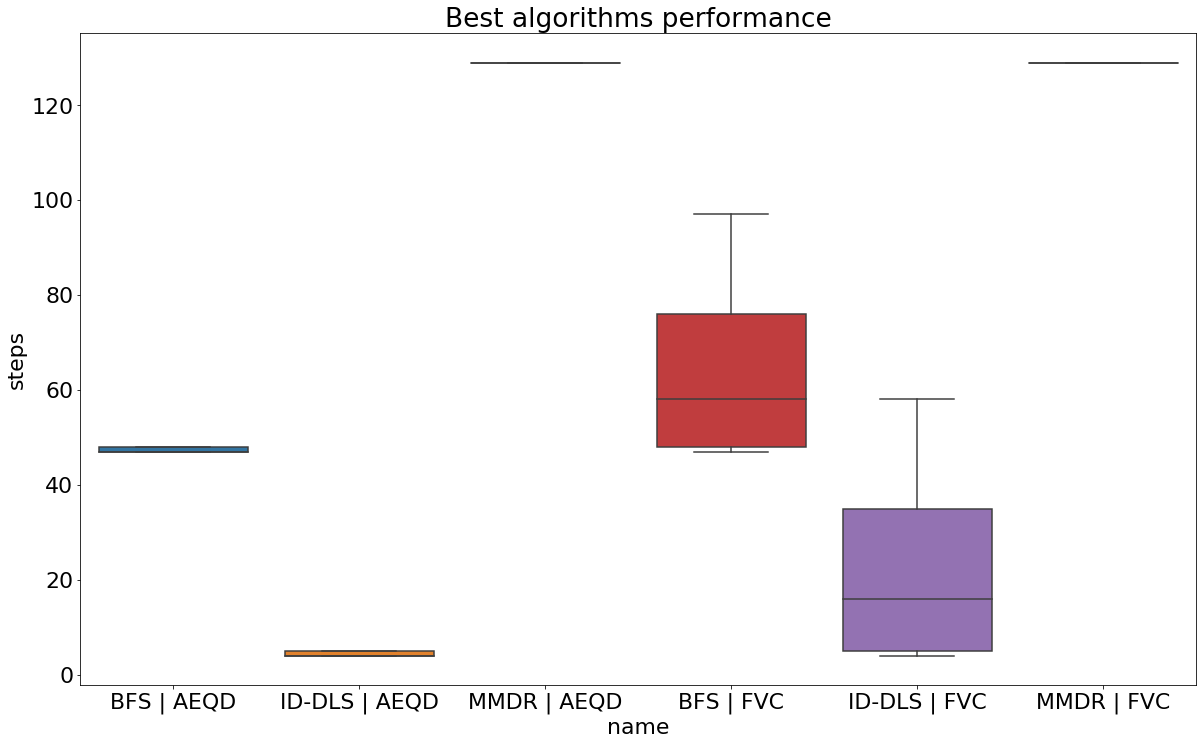

In [11]:
plt.figure(figsize=(20, 12))
df_best["name"] = df_best.apply(lambda ah: f"{ah[0]} | {ah[1]}", axis=1)
sns.boxplot("name", "steps", data=df_best.explode("steps").sort_values(by=["heuristics", "algorithm"]))
plt.title("Best algorithms performance");

c:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


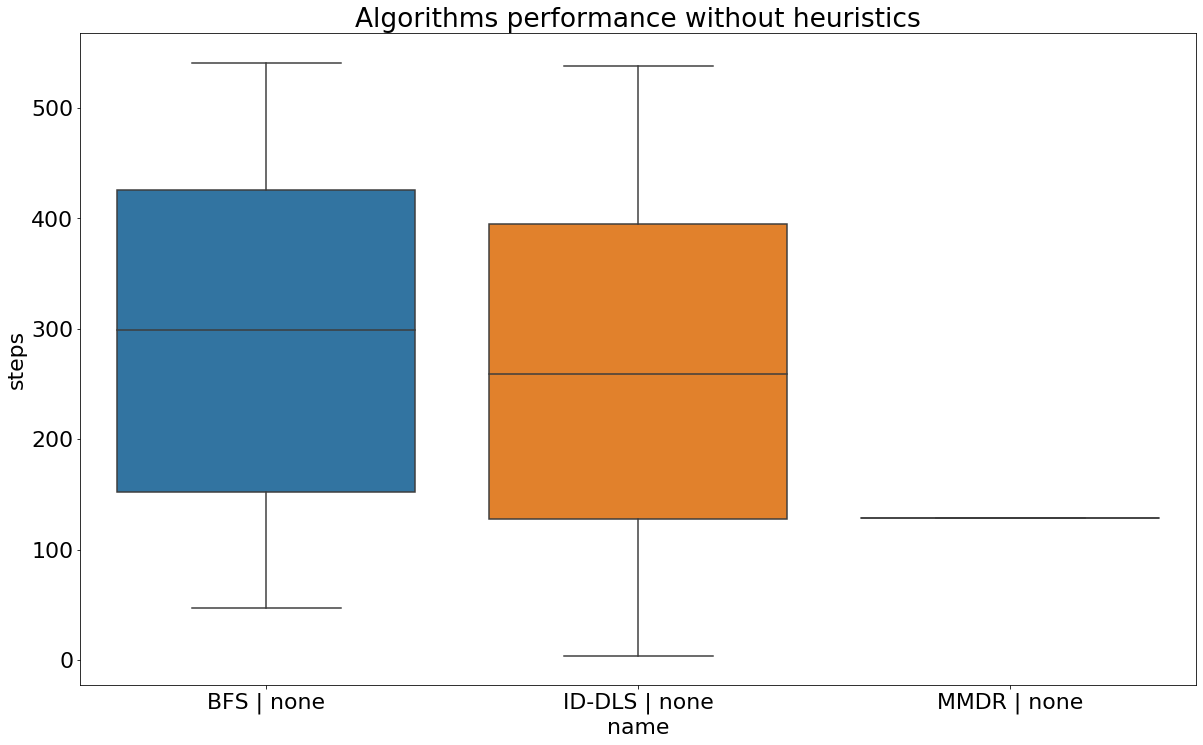

In [12]:
df_no_heur = df[(df.heuristics.isin(["none"]))]

plt.figure(figsize=(20, 12))
df_no_heur["name"] = df_no_heur.apply(lambda ah: f"{ah[0]} | {ah[1]}", axis=1)
sns.boxplot("name", "steps", data=df_no_heur.explode("steps").sort_values(by=["heuristics", "algorithm"]))
plt.title("Algorithms performance without heuristics");

In [13]:
smd_iddls = df[(df.algorithm == "ID-DLS") & (df.heuristics == "AEQD")].steps.values[0]
bfs_none = df[(df.algorithm == "BFS") & (df.heuristics == "none")].steps.values[0]

print(f"BFS: {np.mean(bfs_none)} +- {np.std(bfs_none)}")
print("MMDR:", 129)
print(f"AEQD ID-DLS: {np.mean(smd_iddls)} +- {np.std(smd_iddls)}")


BFS: 291.2 +- 161.2264504767544
MMDR: 129
AEQD ID-DLS: 4.4375 +- 0.49607837082461076


In [14]:
print("Total speedup:", np.mean(bfs_none) / np.mean(smd_iddls))


Total speedup: 65.6225352112676
